In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np 


# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a range of k values to try
k_values = np.arange(2,round(np.sqrt(len(X_train)),0).astype(int))

# Perform cross-validation for each k value
mean_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=6)
    mean_scores.append(scores.mean())

# Print the mean scores for each k value
for k, score in zip(k_values, mean_scores):
    print("Mean Accuracy for k =", k, ":", score)


Mean Accuracy for k = 2 : 0.9155773420479303
Mean Accuracy for k = 3 : 0.9340958605664489
Mean Accuracy for k = 4 : 0.9242919389978214
Mean Accuracy for k = 5 : 0.9433551198257081
Mean Accuracy for k = 6 : 0.9248366013071895
Mean Accuracy for k = 7 : 0.9340958605664489
Mean Accuracy for k = 8 : 0.9346405228758169
Mean Accuracy for k = 9 : 0.9340958605664489


In [45]:
 
# Find the best k value
best_k = k_values[mean_scores.index(max(mean_scores))]
print("Best k value:", best_k)

# Train the final KNN model with the best k value
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = knn.score(X_test, y_test)
print("Accuracy on test set:", accuracy)


Best k value: 5
Accuracy on test set: 1.0


# how would we find value of k

In [96]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Load the breast cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target



# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Define a range of k values to try
k_values = np.arange(2,round(np.sqrt(len(X_train)),0).astype(int))

# Perform cross-validation for each k value
mean_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    mean_scores.append(scores.mean())

# Print the mean scores for each k value
for k, score in zip(k_values, mean_scores):
    print("Mean Accuracy for k =", k, ":", score)

# Find the best k value
best_k = k_values[mean_scores.index(max(mean_scores))]
print("Best k value:", best_k)

# Train the final KNN model with the best k value
knn = KNeighborsClassifier(n_neighbors=7)#use best_k
knn.fit(X_train, y_train)


Mean Accuracy for k = 2 : 0.9422468354430379
Mean Accuracy for k = 3 : 0.9597784810126582
Mean Accuracy for k = 4 : 0.9572468354430381
Mean Accuracy for k = 5 : 0.9547151898734176
Mean Accuracy for k = 6 : 0.9547151898734179
Mean Accuracy for k = 7 : 0.9572468354430379
Mean Accuracy for k = 8 : 0.959746835443038
Mean Accuracy for k = 9 : 0.9572151898734177
Mean Accuracy for k = 10 : 0.9572784810126581
Mean Accuracy for k = 11 : 0.9571835443037975
Mean Accuracy for k = 12 : 0.9572151898734178
Mean Accuracy for k = 13 : 0.9596835443037974
Mean Accuracy for k = 14 : 0.9647468354430379
Mean Accuracy for k = 15 : 0.9572151898734177
Mean Accuracy for k = 16 : 0.962246835443038
Mean Accuracy for k = 17 : 0.9572468354430379
Mean Accuracy for k = 18 : 0.959746835443038
Mean Accuracy for k = 19 : 0.9572468354430379
Best k value: 14


KNeighborsClassifier(n_neighbors=7)

In [97]:
knn.score(X_test,y_test)

0.9590643274853801

In [98]:
knn.predict(X_test)

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [99]:
y_train==knn.predict(X_test)

C:\Users\Deepak\AppData\Local\Temp\ipykernel_10592\2043757446.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  y_train==knn.predict(X_test)


False

In [100]:
arr1 = np.array(y_test)
arr2 = np.array(knn.predict(X_test))


comparison = np.equal(arr1, arr2)
print(comparison.sum()/len(y_test))


0.9590643274853801


# Overfiting and underfiting case 

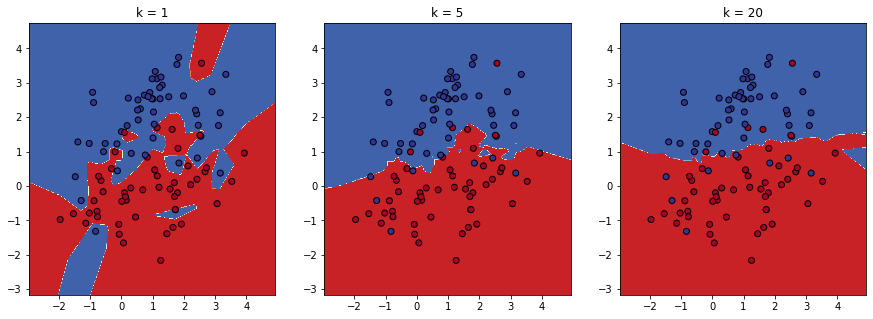

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

# Generate noisy data
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42, flip_y=0.1)
rng = np.random.RandomState(42)
X += 2 * rng.uniform(size=X.shape)

# Fit the k-NN model with different values of k
k_values = [1, 5, 20]
fig, axes = plt.subplots(1, len(k_values), figsize=(15, 5))

for i, k in enumerate(k_values):
    # Create k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)

    # Plot decision surface
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axes[i].contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    axes[i].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k')
    axes[i].set_title(f"k = {k}")

plt.show()

